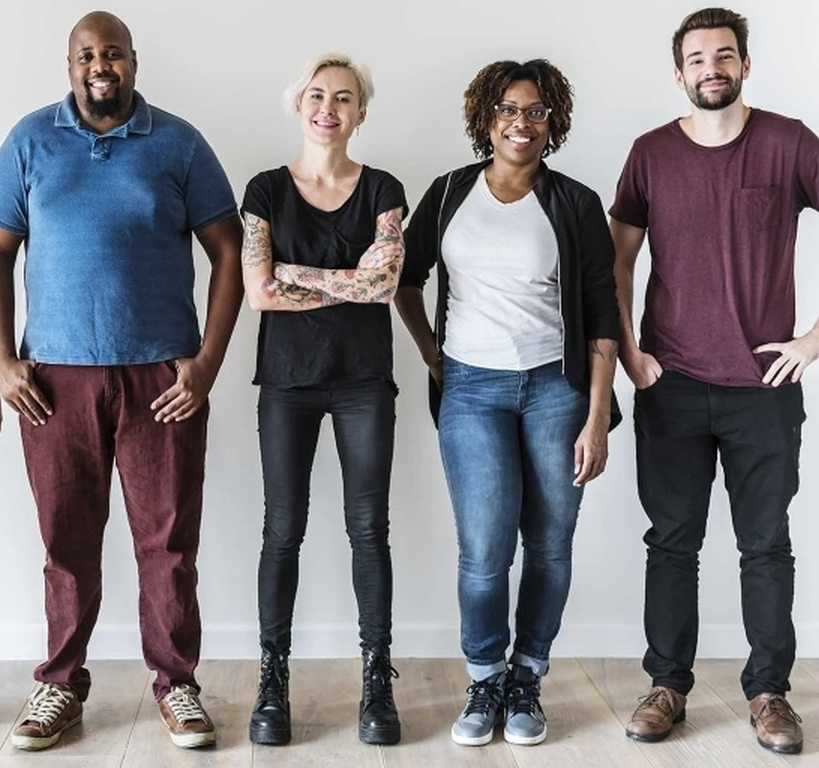

Rostros detectados:


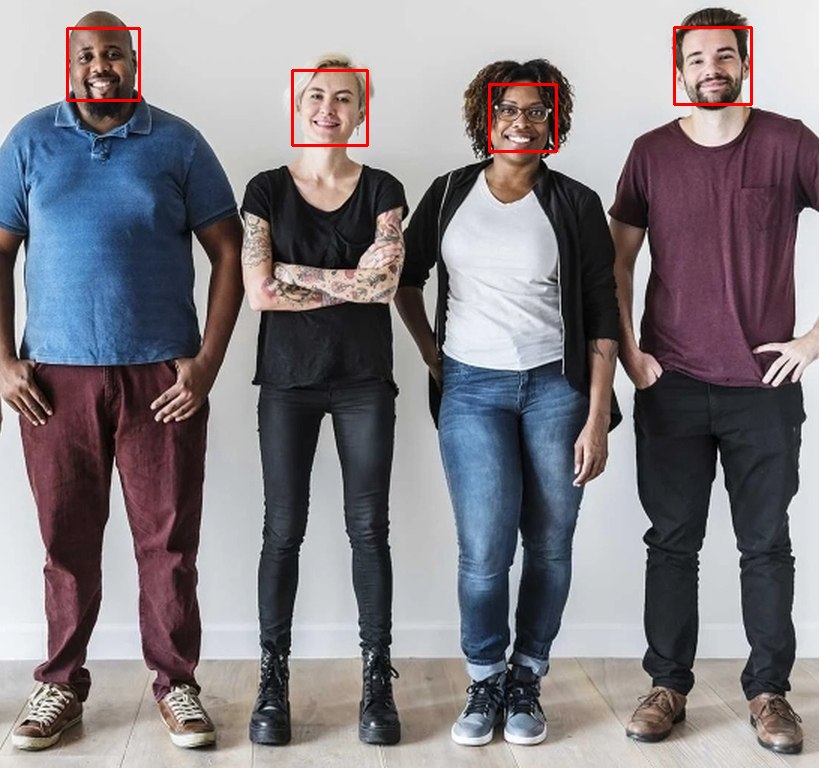

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
Im=cv.imread('/content/drive/MyDrive/Colab Notebooks/personas.jpg')
cv2_imshow(Im)
face_cascade = cv.CascadeClassifier(cv.data.haarcascades +'haarcascade_frontalface_default.xml')
gray=cv.cvtColor(Im, cv.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.1,5)
for (x,y,w,h) in faces:
    Img = cv.rectangle(Im,(x,y),(x+w,y+h),(0,0,255),2)
print('Rostros detectados:')    
cv2_imshow(Img)   



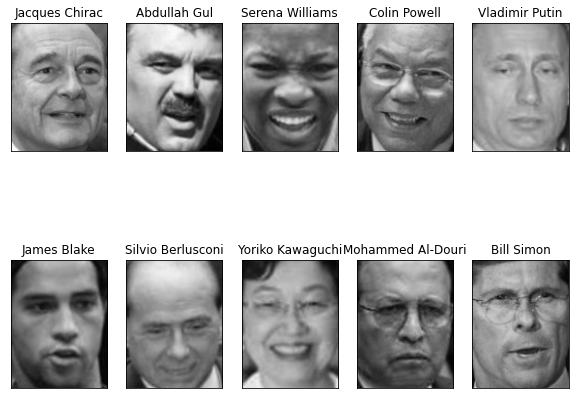

In [ ]:
#códigos tomados  de : "Introduction to Machine Learning with python"  by A. C. Muller
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt


people = fetch_lfw_people(min_faces_per_person=10, resize=1)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(10, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image,cmap='gray',vmin=0, vmax=255)
    ax.set_title(people.target_names[target])
   




In [ ]:
#descripción del conjunto:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))


# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

people.images.shape: (3023, 125, 94)
Number of classes: 62
Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jere

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#seleccionar sólo 20 imágenes pr persona
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:20]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.



# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Test set score of 1-nn: 0.17


In [ ]:
from sklearn.decomposition import PCA

#extraer PCA
pca = PCA(n_components=90, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

#clasificar con PCA 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1905, 90)
Test set accuracy: 0.21


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


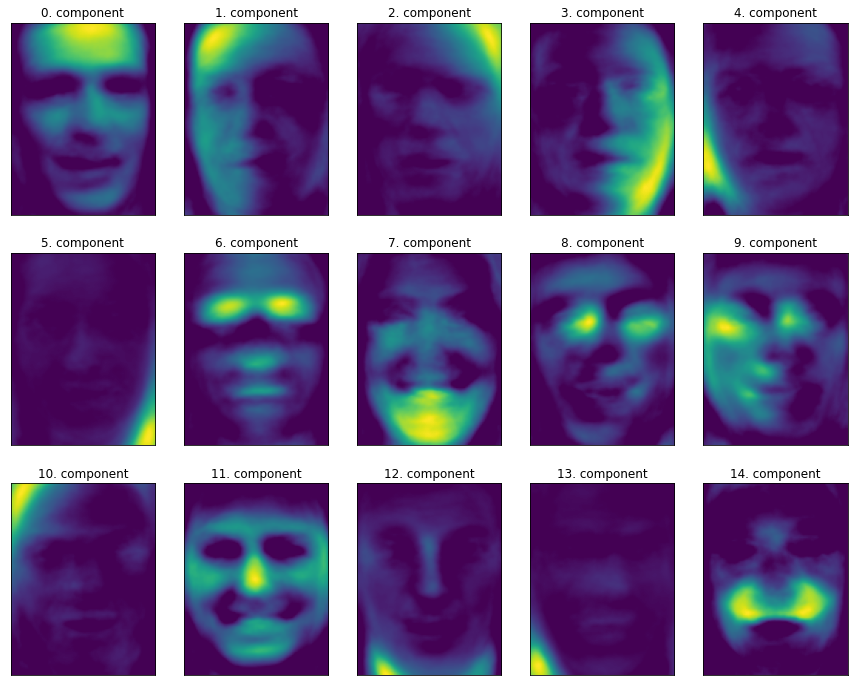

In [ ]:
#considerando NMF   -- Non Matrix Factorization

from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

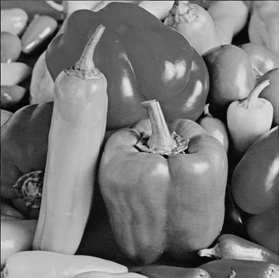

Textura obtenida:


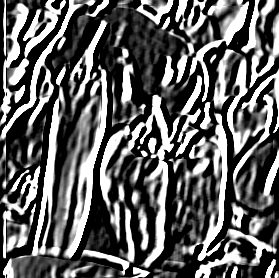

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow





img = cv.imread('/content/drive/MyDrive/Colab Notebooks/peppers.bmp')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gabor = cv.getGaborKernel((11,11), 10.0, np.pi/9, 10.0, 0.5, 0, ktype=cv.CV_32F,)
filtered_img = cv.filter2D(img, cv.CV_8UC3, gabor)
cv2_imshow(img)
print('Textura obtenida:')
cv2_imshow(filtered_img)



Detector de esquinas de Harris


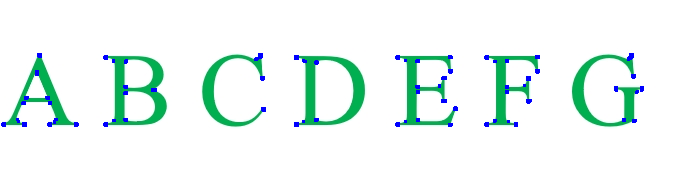

In [3]:
from matplotlib.pyplot import imshow
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

a=cv.imread('/content/drive/MyDrive/Colab Notebooks/letras.jpg')
print('Detector de esquinas de Harris')
#aplicar detector de harris
gray = cv.cvtColor(a,cv.COLOR_BGR2GRAY)

Ha = cv.cornerHarris(gray,2,3,0.01)
Ha=cv.dilate(Ha,None)
a[Ha>0.02*Ha.max()]=[255,0,0]
cv2_imshow(a)